## Data/Loading/ functions

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [52]:
#Load data
labels = np.load('Simulations\labels_test.npy')
dataset =  np.load('Simulations\y_test.npy')

#embeded datasets
pkl_filename = "tembedded_dataset.txt"
pkl_filename2 = "uembedded_dataset.txt"
pkl_filename3 = "pcaembedded_dataset.txt"

#Load reduced versions of the data from file
with open(pkl_filename, 'rb') as file:
    x_embedded = pickle.load(file)
    
    
with open(pkl_filename2, 'rb') as file2:
    u_embedded = pickle.load(file2).embedding_
    

with open(pkl_filename3, 'rb') as file3:
    p_embedded = pickle.load(file3)
print(len(u_embedded))
    
range_ = np.arange(1,101,1) #useful for plotting

Thu Feb 24 14:17:22 2022 Building and compiling search function
50000


Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


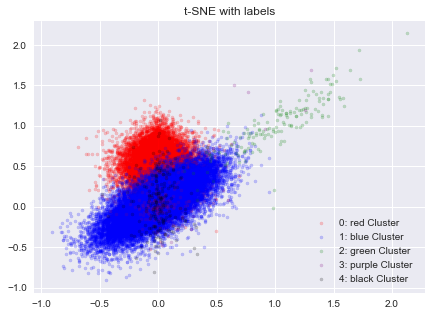

Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


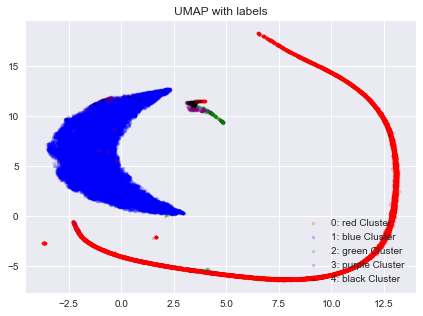

Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


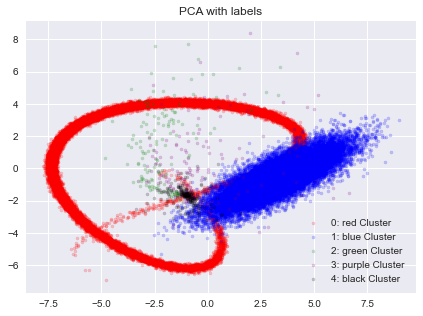

In [53]:
def groups(array,lowest_class):
    groups = []
    counter = lowest_class
    while True:
        cluster = (array == counter).sum()
        if cluster != 0:
            groups.append(cluster)
            counter += 1
        else:
            break;
        
    return groups

# plot an example from a class as given by a model

def plot_(array,cluster_number,point): #takes model predictions,class to plot from, whether to plot the
                                        #first,second or third example
    index = 0
    number = 0
    while index != len(array):
        if array[index] == cluster_number:
            plt.scatter(range_,dataset[index])
            plt.show()
            number +=1
        if number ==point:
            break;
        index +=1
    return 

#Shade Predictions according to model

def shade(embedded_dataset,predictions,numof_class,name):
    colours = ['red','blue','green','purple','black','yellow','orange','cyan','magenta']
    #First we split the dataset according predicted classes
    classes = []
    for j in range(numof_class):
        print("Isolating Class ")
        Class =[]
        for i in range(len(predictions)):
            if  predictions[i] ==j:
                Class.append(embedded_dataset[i])
        classes.append(Class)
    
    #Plotting the classses
        #Initialize plot
    plt.style.use("seaborn")
    plt.figure(figsize=(7,5))
    #plt.figure(facecolor="g")
    
    legend = []
    samples = []
    print("Plotting")
    for i in range(numof_class):
        classes[i] = np.array(classes[i])
        plt.scatter(classes[i][:,0],classes[i][:,1],s = 10,c = colours[i],alpha = 0.2)
        legend.append(str(i) +": " +colours[i] + " Cluster ")
        
    plt.legend(legend, 
               loc='lower right')
    plt.title(name)
    plt.savefig(name+"shade.png")
    plt.show()
    
    return
shade(x_embedded,labels,5,"t-SNE with labels")
shade(u_embedded,labels,5,"UMAP with labels")
shade(p_embedded,labels,5,"PCA with labels")

    

## Performance evaluation

Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


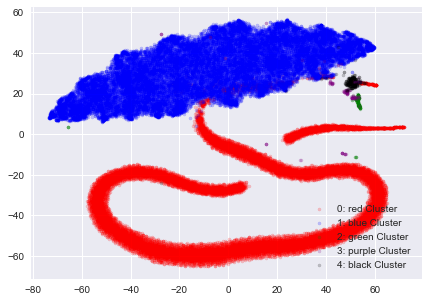

In [ ]:

colours = ['red','blue','green','purple','black','yellow','orange']
for i in range(5):
    for j in range(len(labels)):
        if labels[j+9] ==4:
            plt.scatter(range_,dataset[j+9],c = colours[4])
            plt.show()
            break;
        
    

## K-Means Clustering

In [200]:
#Initialize model
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=0.0001,
            verbose=0, 
            random_state=None, 
            copy_x=True,
            algorithm='auto')

In [201]:
#Cluster and save

km = km.fit_predict(u_embedded)
pkl_filename = "KMean2D.plk"

with open(pkl_filename, 'wb') as file:
    pickle.dump(km,file)


Isolating Class 
Isolating Class 
Isolating Class 
Plotting
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


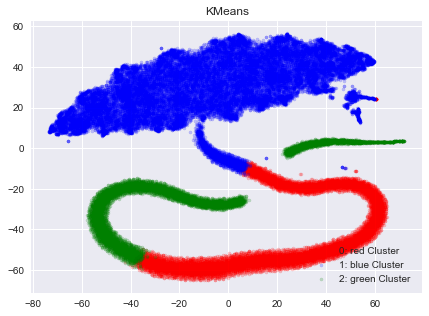

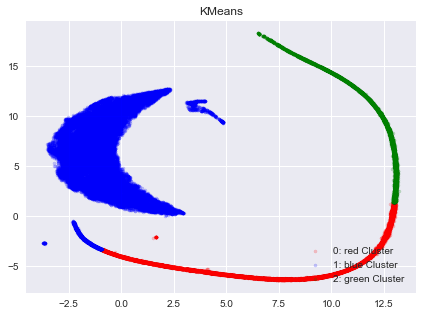

In [203]:
#Load and evaluate

pkl_filename = "KMean2D.plk"

with open(pkl_filename, 'rb') as file:
    km = pickle.load(file)

shade(x_embedded,km,3,"KMeans")
shade(u_embedded,km,3,"KMeans")

In [13]:
groups(km,0)
plot_(km,0,3)
plot_(km,1,3)
plot_(km,2,3)

In [15]:
print(first,second,third,well_fourth)

## Mean-Shift Clustering

In [24]:
#Libraries
from sklearn.cluster import MeanShift

In [205]:
#Initialize,train save

ms = MeanShift( bandwidth=None,
               seeds=None, #Default seed finding functions scale horribly with dimensions
               bin_seeding=True, #True implies initial windows are not on all points
               min_bin_freq=1,
               cluster_all=False, #Unclustered outcasts points will be labelled -1
               n_jobs=-1,
               max_iter=100,
              )
ms=ms.fit_predict(u_embedded)
pkl_filename = "Mean_Shift10CA2D.plk"
save
with open(pkl_filename, 'wb') as file:
    pickle.dump(ms,file)

NameError: name 'save' is not defined

In [ ]:
#Load and evaluate

pkl_filename = "Mean_Shift10CA2D.plk"
with open(pkl_filename, 'rb') as file:
    ms = pickle.load(file)

nms = np.where(ms ==-1,1,ms)
for i in range(len(ms)):
    if ms[i] ==1:
        print(ms[i])
shade(x_embedded,nms,2,"Mean_ShadeCallCA")
shade(u_embedded,nms,2,"Mean_ShadeCallCA")

Isolating Class 
Isolating Class 
Plotting
Isolating Class 
Isolating Class 
Plotting


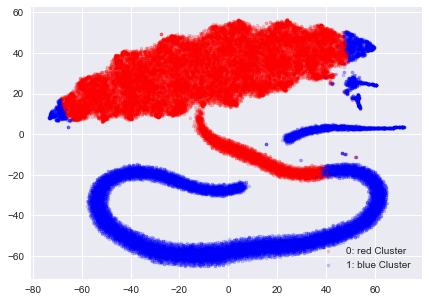

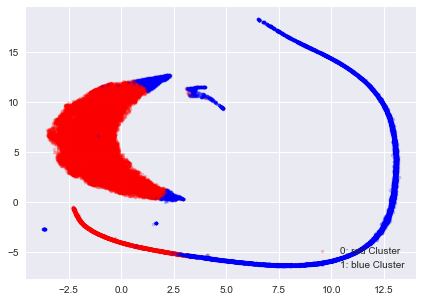

## Density Based Spatial Clustering of Applications with Noise

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbc =  DBSCAN(eps = 50,
                 min_samples = 50,  #eps and min_samples 
                 metric = 'l1',
                 n_jobs = 10)


In [ ]:
dbc.fit(u_embedded[0:10000])

In [208]:
pkl_filename = "dbscan2D.plk"

with open(pkl_filename, 'wb') as file:
    pickle.dump(dbc,file)

In [209]:
pkl_filename = "dbscan2D.plk"

with open(pkl_filename, 'rb') as file:
    dbc = pickle.load(file)

print(metrics.rand_score(dbc.labels_,labels[0:10000]))
print(groups(dbc.labels_,-1))


0.48976057605760576
[]


0
Isolating Class 
Plotting
Isolating Class 
Plotting


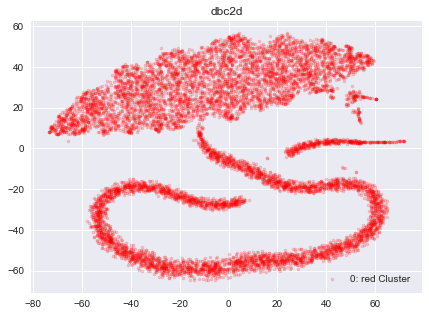

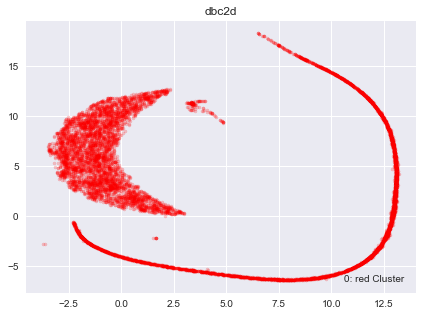

In [210]:
a = dbc.labels_
print(a.max())

a = np.where(a ==-1,a.max()+1,a)
shade(x_embedded[0:10000],a,a.max()+1,"dbc2d")
shade(u_embedded[0:10000],a,a.max()+1,"dbc2d")

## Hierachichal Density based clustering

In [6]:
import hdbscan

In [212]:
a =np.random.choice(100,100,replace = False)

In [7]:
a = np.random
hd = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40,
    metric='minkowski', min_cluster_size=500, min_samples=100, p=1)


In [8]:
hd.fit(u_embedded)
pkl_filename = "hdbscan_custu.plk"

with open(pkl_filename, 'wb') as file:
    pickle.dump(hd,file)

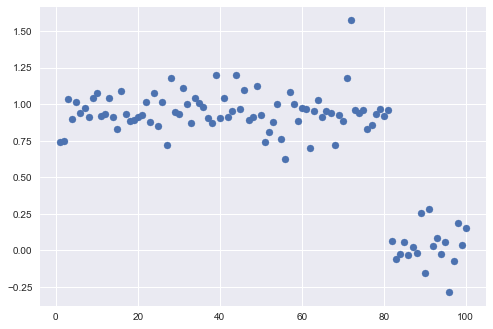

In [9]:
plot_(hd.labels_,-1,4)


hdbscan_custu.plk
2
[1, 24409, 596, 24994]
Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


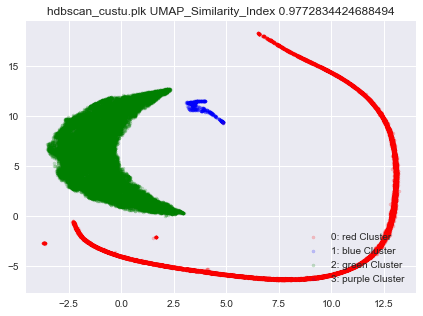

In [12]:


def evaluate(model):
    print(model)
    with open(model, 'rb') as file:
        hd = pickle.load(file)


    a = np.array(hd.labels_)
    print(a.max())
    print(groups(a,-1)) #Number of elements per cluster
    a = np.where(a==-1,a.max()+1,a)
    similarity = metrics.rand_score(hd.labels_,labels)
    #shade(x_embedded[0:5000],a,a.max()+1,model)
    shade(u_embedded,a,a.max()+1,model+" UMAP_Similarity_Index " + str(similarity))
    return


#evaluate("hdbscan_cust5.plk")
#evaluate("hdbscan_cust50.plk")
#evaluate("hdbscan_cust150.plk")
#evaluate("hdbscan_cust500.plk")
evaluate("hdbscan_custu.plk")



## Dimensionality Reduction techniques

In [54]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

def tsine(dataset):
    x_embedded = TSNE(n_components = 2,
                      learning_rate = 'auto',
                     init = 'random',
                      verbose = 5,
                      )
    x_embedded = x_embedded.fit_transform(dataset)

    #Save 2D represenatation

    pkl_filename = "embedded_dataset.txt"
    #Load from file
    with open(pkl_filename, 'wb') as file:
        pickle.dump(x_embedded,file) 
    print(x_embedded)
    return x_embedded

def umpap(dataset):
    reducer = umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
    
    u_embedded = reducer.fit(dataset)
        #Save 2D represenatation

    pkl_filename = "uembedded_dataset.txt"
    #Load from file
    with open(pkl_filename, 'wb') as file:
        pickle.dump(u_embedded,file) 
        
    return u_embedded

def pca(dataset):
    pca = PCA(n_components=2,
              copy=True,
              whiten=False,
              svd_solver='auto',
              tol=0.0, iterated_power='auto',
              random_state=None)
    pca = pca.fit_transform(dataset)
    
    #Save 2D represenatation

    pkl_filename = "pcaembedded_dataset.txt"
    #Load from file
    with open(pkl_filename, 'wb') as file:
        pickle.dump(pca,file) 
        
    return pca
      
%time

Wall time: 0 ns


In [ ]:
tsine(dataset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.011s...


In [18]:
u_embedded.embedding_

array([[-0.9706506 ,  9.241809  ],
       [ 0.6077997 ,  1.5494629 ],
       [-2.187697  ,  4.8194346 ],
       ...,
       [-0.38690725,  9.1743145 ],
       [12.691327  ,  8.978811  ],
       [ 0.92778224, -4.536303  ]], dtype=float32)

## Playing around

In [26]:
# Dropout Feature extraction
from numpy import random
np.random.randint(100)

def droppout(dataset):
    pickle_name = "datadroppout3.plk"
    new_dataset = []
    
    for i in range(len(dataset)):
        data_point = []                          # reduced array to be appended
        
        for j in range(10):
            
            data_point.append(dataset[i][10*j])

            
        new_dataset.append(data_point)
    with open(pkl_filename, 'wb') as file:
        pickle.dump(new_dataset,file)
        
    return len(dataset[0]),len(new_dataset[0])
    
            

droppout(dataset) 

(100, 10)

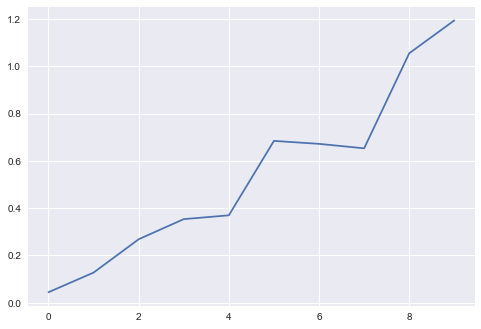

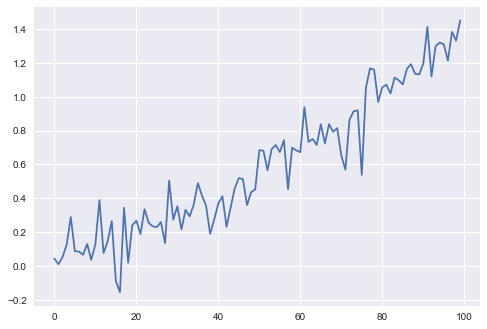

In [163]:
plt.plot(reduced_dataset[4133])
plt.show()
plt.plot(dataset[4133])
plt.show()


In [10]:
pickle_name = "datadroppout3.plk"

with open(pkl_filename, 'rb') as file:
    reduced_dataset = pickle.load(file)
    
hd = hdbscan.HDBSCAN(min_cluster_size = 20,
                     min_samples = 4000)

hd.fit(reduced_dataset)

ValueError: Expected 2D array, got scalar array instead:
array=HDBSCAN(metric='minkowski', min_cluster_size=50, min_samples=5, p=0.125).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

1
[15221, 10411, 24368]
[ 1 -1  1 ...  1 -1 -1]
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


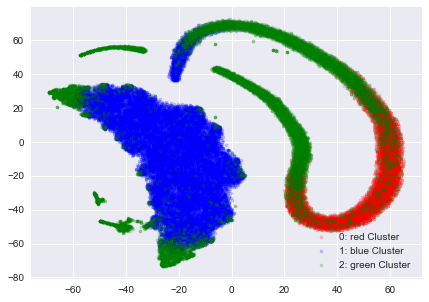

In [164]:
a = np.array(hd.labels_)
print(a.max())
print(groups(a,-1)) #Number of elements per cluster
a = np.where(a==-1,a.max()+1,a)
print(hd.labels_)

shade(x_embedded,a,a.max()+1,"reduced_hdbscan_min_samples4_mincluster100")

In [52]:
with open('Simulations\train-images.idx3-ubyte','rb') as images:
    a = images.read()
with open('Simulations\train-labels.idx1-ubyte','rb') as imlabels:
    b = imlabels.read()

OSError: [Errno 22] Invalid argument: 'Simulations\train-images.idx3-ubyte'

In [64]:
import pandas as pd
a = pd.read_csv('Simulations\mnist_train.csv').to_numpy()

In [88]:
for i in range(1,50):
    print( sum(dataset[1]**(i))**(1/i))

74.09540682595866
8.311905474991951
4.197284210600606
3.044209991928589
2.536437640662315
2.2587439010006247
2.0863915186404247
1.9701905578446333
1.8871463567240507
1.8251766154460616
1.7773663350182525
1.739490891409847
1.7088328433781028
1.683569789230479
1.6624367336479042
1.6445298181429526
1.6291871038375485
1.6159134058439757
1.6043313585248977
1.5941486585654148
1.5851355959866293
1.577109306182943
1.5699225187994497
1.5634553800459414
1.557609416107559
1.5523030140693346
1.5474679953292105
1.5430469867979757
1.538991382327378
1.5352597460741393
1.5318165504470902
1.528631169971951
1.5256770727774067
1.522931166046949
1.520373262424637
1.5179856421830427
1.5157526917643636
1.513660603651509
1.511697125809151
1.5098513514355258
1.5081135416854345
1.5064749755092735
1.5049278219087328
1.503465030815686
1.5020802395152881
1.5007676921011626
1.4995221699028989
1.498338931188955
1.4972136587407068
